In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
M=pd.read_excel("/content/14_MATRICULAS_ED_SUPERIOR_LOS_LAGOS_2021.xlsx")

cols_numericas = ['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)', 'DURACION TOTAL CARRERA (SEMESTRES)']

for col in cols_numericas:
    M[col] = pd.to_numeric(M[col], errors='coerce')
M_limpio = M.dropna(subset=cols_numericas)

print(f"Datos originales: {len(M)} filas")
print(f"Datos limpios: {len(M_limpio)} filas")

print("\nPrimeras 5 filas")
print(M_limpio.head())

print("\nInformación General")
M_limpio.info()

Datos originales: 34372 filas
Datos limpios (para análisis numérico): 34372 filas

Primeras 5 filas (datos limpios)
    ID     GENERO  EDAD RANGO EDAD  AÑO INGRESO SEMESTRE INGRESO  \
0   45   Femenino    22   20 a 24          2018  Primer semestre   
1   49   Femenino    54   40 y mas         2019  Primer semestre   
2   51   Femenino    25   25 a 29          2020  Primer semestre   
3   75  Masculino    23   20 a 24          2019  Primer semestre   
4  121   Femenino    19   15 a 19          2020  Primer semestre   

            TIPO DE INSTITUCION      NOMBRE DE INSTITUCION  \
0        Universidades Privadas    UNIVERSIDAD SANTO TOMAS   
1           Universidades CRUCH   UNIVERSIDAD DE LOS LAGOS   
2  Centros de Formacion Tecnica                 CFT INACAP   
3           Universidades CRUCH   UNIVERSIDAD DE LOS LAGOS   
4        Universidades Privadas  UNIVERSIDAD SAN SEBASTIAN   

  ACREDITACION INSTITUCIONAL   PERIODO DE ACREDITACION  ...  \
0                 ACREDITADA  31/03/202

Ítem 1
Investiguen las siguientes preguntas

1. Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución.
   ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.
2. ¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?




--- ÍTEM 1.1: CORRELACIÓN Y DISTRIBUCIÓN (MATRÍCULA VS ARANCEL) ---

Correlación general Matrícula vs Arancel: 0.4413

Correlación por Tipo de Institución:
  - Universidades Privadas: 0.5408
  - Universidades CRUCH: 0.6967
  - Centros de Formacion Tecnica: 0.4400
  - Institutos Profesionales: 0.3330

Asimetría (Skew) de Matrícula: 5.9038
Asimetría (Skew) de Arancel: 1.5947

Curtosis (Kurtosis) de Matrícula: 68.6892
Curtosis (Kurtosis) de Arancel: 3.7949


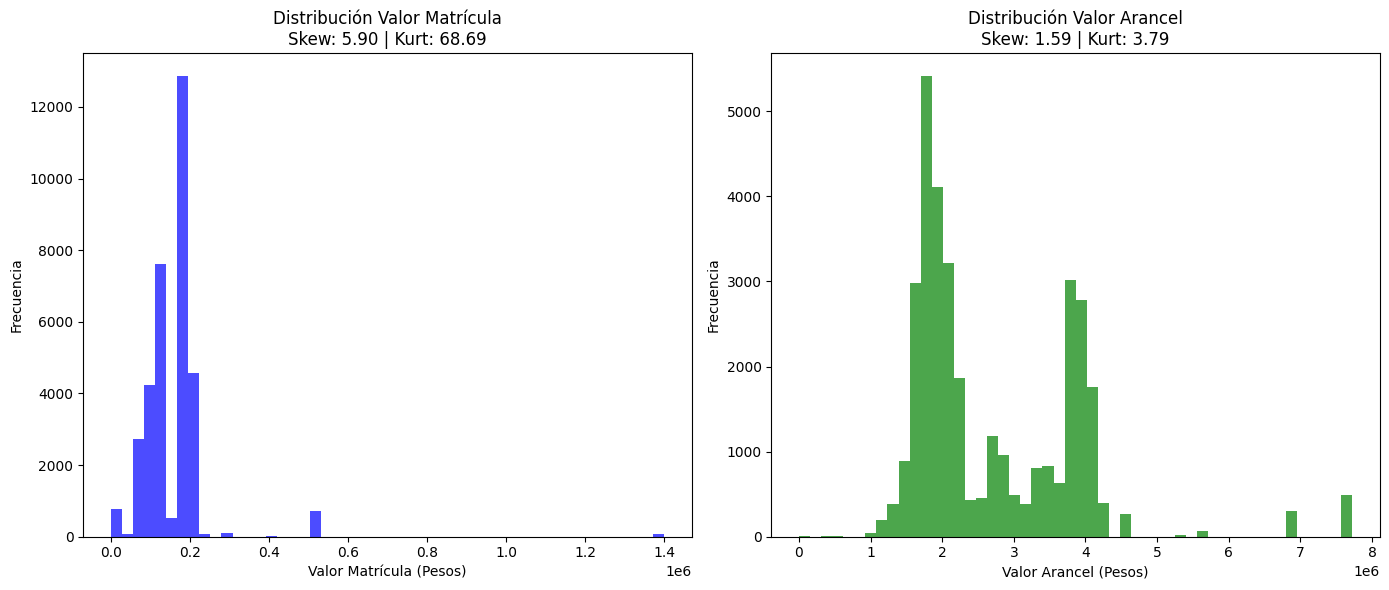

/tmp/ipython-input-430623134.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', len(tipos_institucion))


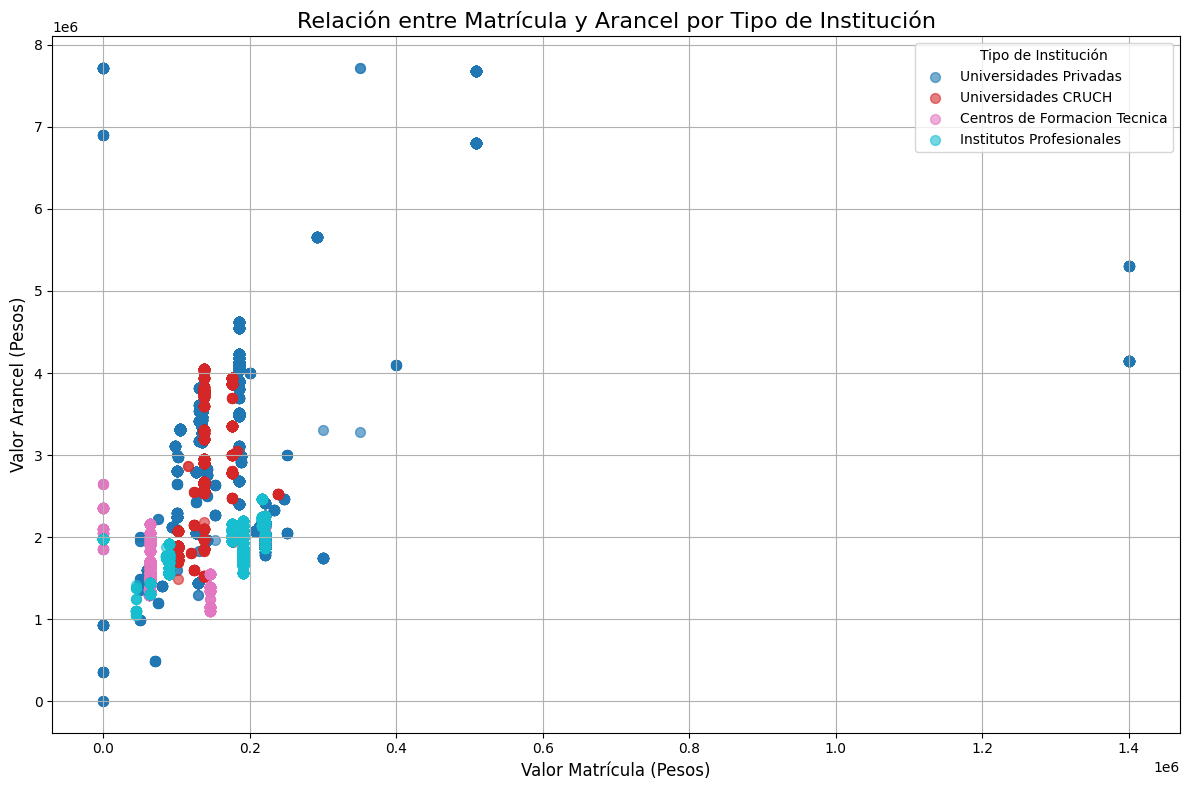

In [ ]:
#1.1
col_matricula = 'VALOR MATRICULA (PESOS)'
col_arancel = 'VALOR ARANCEL (PESOS)'
correlacion_general = M_limpio[[col_matricula, col_arancel]].corr().iloc[0, 1]
print(f"\nCorrelación general Matrícula vs Arancel: {correlacion_general:.4f}")

print("\nCorrelación por Tipo de Institución:")
tipos_institucion = M_limpio['TIPO DE INSTITUCION'].unique()
for tipo in tipos_institucion:
    M_filtrado = M_limpio[M_limpio['TIPO DE INSTITUCION'] == tipo]
    if len(M_filtrado) > 1:
        corr_grupo = M_filtrado[[col_matricula, col_arancel]].corr().iloc[0, 1]
        print(f"  - {tipo}: {corr_grupo:.4f}")

skew_matricula = skew(M_limpio[col_matricula])
skew_arancel = skew(M_limpio[col_arancel])
print(f"\nAsimetría (Skew) de Matrícula: {skew_matricula:.4f}")
print(f"Asimetría (Skew) de Arancel: {skew_arancel:.4f}")

kurt_matricula = kurtosis(M_limpio[col_matricula])
kurt_arancel = kurtosis(M_limpio[col_arancel])
print(f"\nCurtosis (Kurtosis) de Matrícula: {kurt_matricula:.4f}")
print(f"Curtosis (Kurtosis) de Arancel: {kurt_arancel:.4f}")



plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(M_limpio[col_matricula], bins=50, color='blue', alpha=0.7)
plt.title(f'Distribución Valor Matrícula\nSkew: {skew_matricula:.2f} | Kurt: {kurt_matricula:.2f}')
plt.xlabel('Valor Matrícula (Pesos)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(M_limpio[col_arancel], bins=50, color='green', alpha=0.7)
plt.title(f'Distribución Valor Arancel\nSkew: {skew_arancel:.2f} | Kurt: {kurt_arancel:.2f}')
plt.xlabel('Valor Arancel (Pesos)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

tipos_institucion = M_limpio['TIPO DE INSTITUCION'].unique()

colores = plt.cm.get_cmap('tab10', len(tipos_institucion))

for i, tipo in enumerate(tipos_institucion):
    M_grupo = M_limpio[M_limpio['TIPO DE INSTITUCION'] == tipo]

    plt.scatter(
        M_grupo[col_matricula],
        M_grupo[col_arancel],
        label=tipo,
        color=colores(i),
        alpha=0.6,
        s=50
    )

plt.title('Relación entre Matrícula y Arancel por Tipo de Institución', fontsize=16)
plt.xlabel('Valor Matrícula (Pesos)', fontsize=12)
plt.ylabel('Valor Arancel (Pesos)', fontsize=12)
plt.legend(title='Tipo de Institución')
plt.grid(True)
plt.tight_layout()
plt.show()


--- ÍTEM 1.2: RELACIÓN ARANCEL VS DURACIÓN ---

Correlación general entre Duración y Arancel: 0.7493
Asimetría (Skew) de Duración: -0.0003
Curtosis (Kurtosis) de Duración: -1.0647

Generando subgráficos (Arancel vs Duración por Área de Conocimiento)...


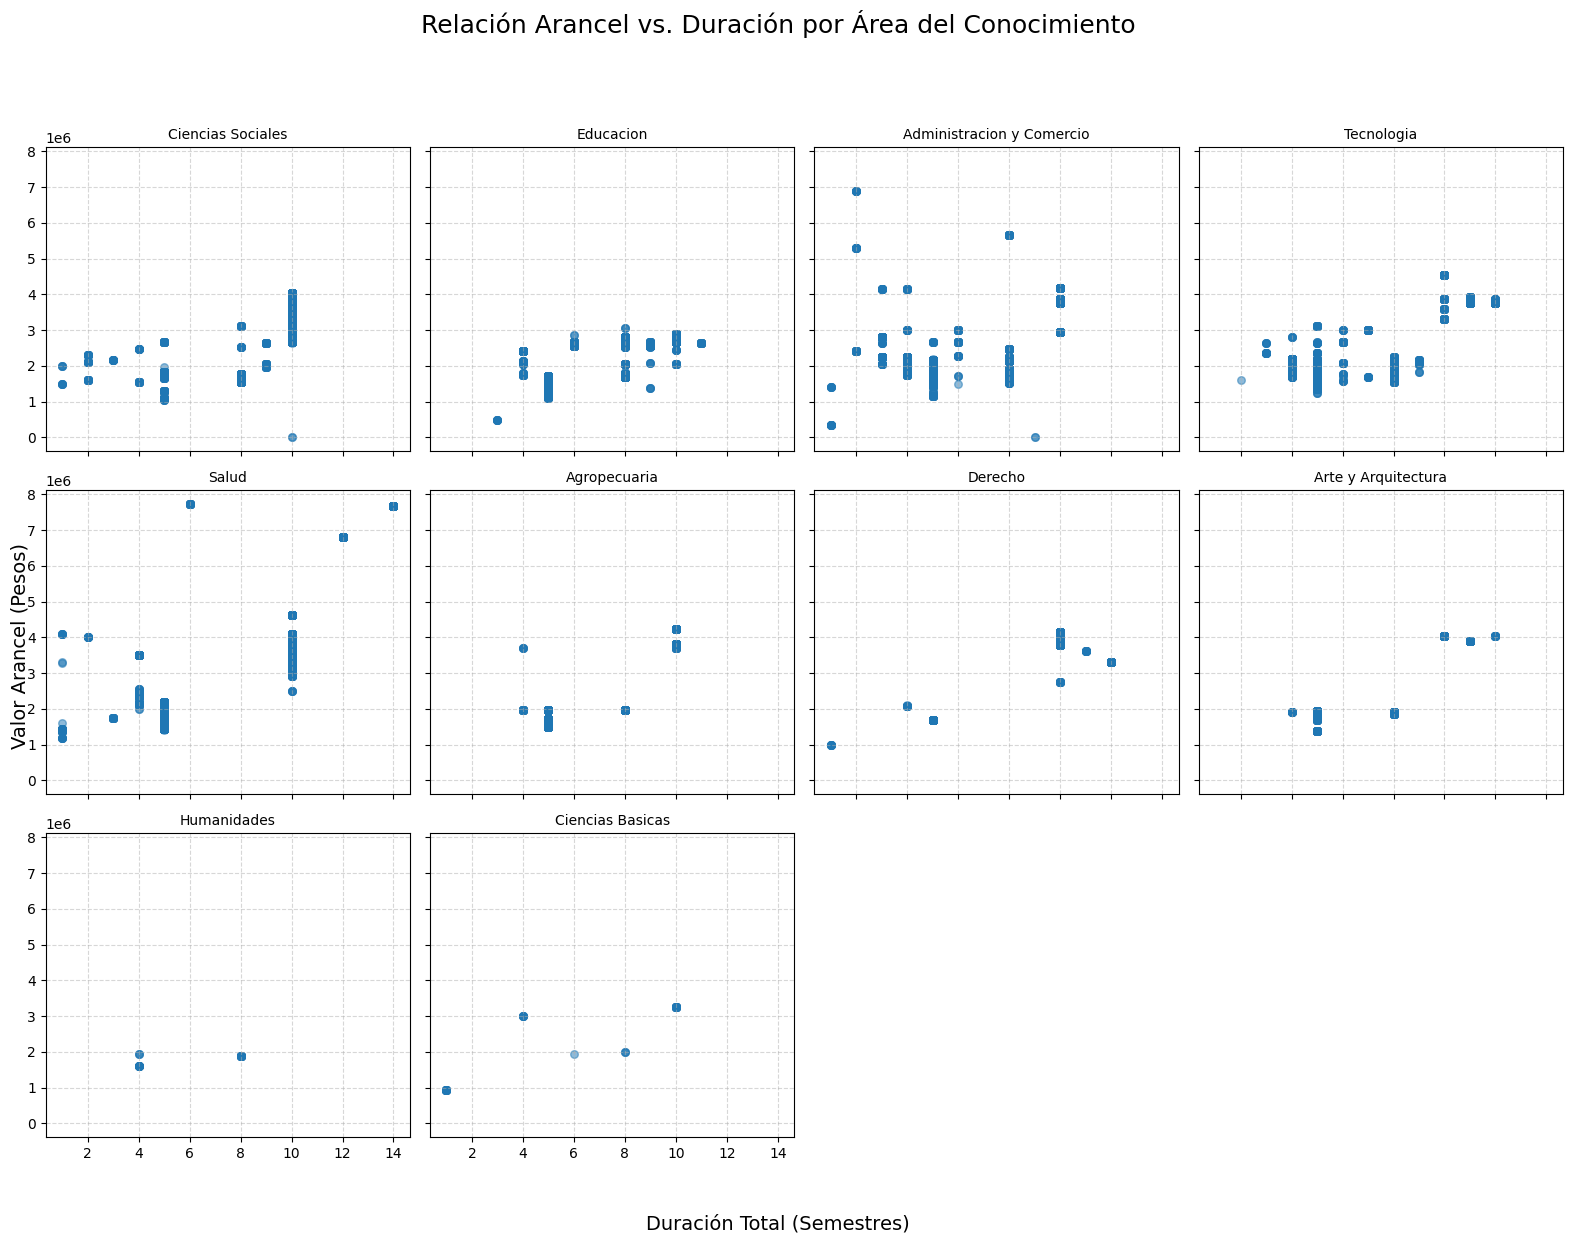

In [ ]:
#1.2
col_duracion = 'DURACION TOTAL CARRERA (SEMESTRES)'
col_arancel = 'VALOR ARANCEL (PESOS)'

correlacion_general_2 = M_limpio[[col_duracion, col_arancel]].corr().iloc[0, 1]
print(f"\nCorrelación general entre Duración y Arancel: {correlacion_general_2:.4f}")

skew_duracion = skew(M_limpio[col_duracion])
kurt_duracion = kurtosis(M_limpio[col_duracion])
print(f"Asimetría (Skew) de Duración: {skew_duracion:.4f}")
print(f"Curtosis (Kurtosis) de Duración: {kurt_duracion:.4f}")

print("\nGenerando subgráficos (Arancel vs Duración por Área de Conocimiento)...")

areas_conocimiento = M_limpio['AREA CONOCIMIENTO'].unique()
n_areas = len(areas_conocimiento)

n_cols = 4
n_rows = int(np.ceil(n_areas / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

for i, area in enumerate(areas_conocimiento):
    M_area = M_limpio[M_limpio['AREA CONOCIMIENTO'] == area]

    ax = axes[i]
    ax.scatter(M_area[col_duracion], M_area[col_arancel], alpha=0.5, s=30)
    ax.set_title(area, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Relación Arancel vs. Duración por Área del Conocimiento', fontsize=18, y=1.03)
fig.supxlabel('Duración Total (Semestres)', fontsize=14)
fig.supylabel('Valor Arancel (Pesos)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Item 2
1. ¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?
2. ¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?
3. ¿Cuál es la probabilidad de seleccionar de los estudiantes hombres de la región a uno del área de educación? ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? ¿Hay una discrepancia aparente? ¿Cómo se explica?

In [ ]:
#2.1
print("\nDistribución porcentual de Modalidad por Año de Ingreso:")

distribucion_modalidad_año = M['AÑO INGRESO'].value_counts(normalize=True).sort_index()
distribucion_modalidad_año = M.groupby('AÑO INGRESO')['MODALIDAD'].value_counts(normalize=True).unstack().fillna(0)
print(distribucion_modalidad_año)

distribucion_modalidad_año.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    title='Distribución de Modalidad de Ingreso por Año'
)
plt.ylabel('Proporción de Estudiantes')
plt.xlabel('Año de Ingreso')
plt.legend(title='Modalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#2.2
modalidades_no_presenciales = ['Semipresencial', 'No Presencial', 'A Distancia']
M_no_presencial = M[M['MODALIDAD'].isin(modalidades_no_presenciales)]

print(f"\nConteo de estudiantes en modalidades NO presenciales ({modalidades_no_presenciales}):")
conteo_no_presencial = M_no_presencial['TIPO DE INSTITUCION'].value_counts()
print(conteo_no_presencial)

conteo_no_presencial.plot(
    kind='barh',
    figsize=(10, 6),
    title='Conteo de Estudiantes en Modalidades NO Presenciales por Tipo de Institución'
)
plt.gca().invert_yaxis()
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Tipo de Institución')
plt.tight_layout()
plt.show()


Distribución porcentual de Modalidad por Año de Ingreso:


NameError: name 'M' is not defined